## 1. Load and Split Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Distribution of Pristine Train Data

In [5]:
train = pd.concat([X_train, y_train], axis=1)

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Outstanding Debt')

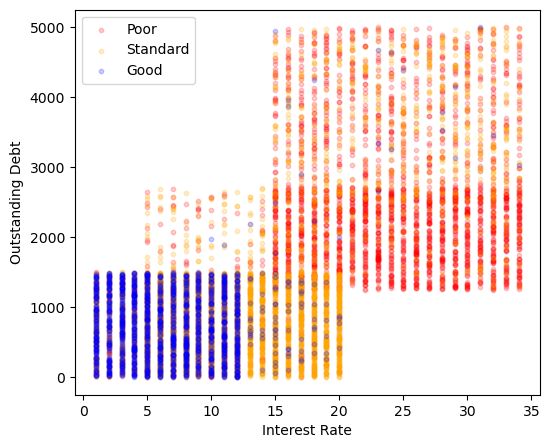

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 3. Create Imbalanced Train Data Deliberately

In [8]:
train_0 = train[train['Credit_Score'] == 0]
train_1 = train[train['Credit_Score'] == 1]
train_2 = train[train['Credit_Score'] == 2]

In [9]:
train_0 = train_0.sample(frac=0.2)
train_2 = train_2.sample(frac=0.2)

In [10]:
train = pd.concat([train_0, train_1, train_2], axis=0)

Text(0, 0.5, 'Outstanding Debt')

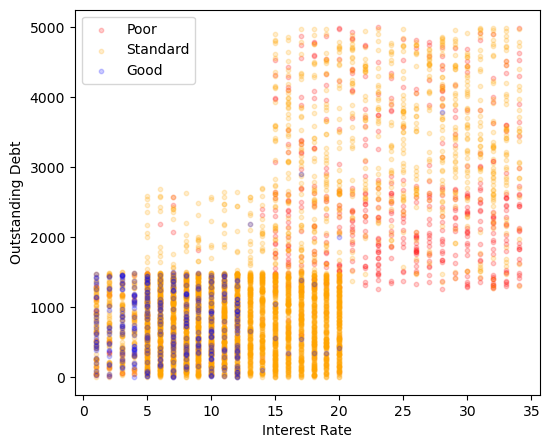

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

In [12]:
x_columns = train.columns.tolist()
x_columns.remove('Credit_Score')
X_train = train[x_columns]
y_train = train['Credit_Score']

## 4. Define Data Transformer

In [13]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## 5. Train RandomForesfClassifier with the Imbalance Data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x00000142C3A2D890>),
                ('rfc', RandomForestClassifier())])

In [17]:
y_test_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69       822
           1       0.61      0.96      0.74      1217
           2       0.87      0.16      0.27       461

    accuracy                           0.68      2500
   macro avg       0.80      0.56      0.57      2500
weighted avg       0.75      0.68      0.64      2500



In [19]:
confusion_matrix(y_test,y_test_pred)

array([[ 453,  367,    2],
       [  45, 1163,    9],
       [   0,  388,   73]], dtype=int64)

In [20]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

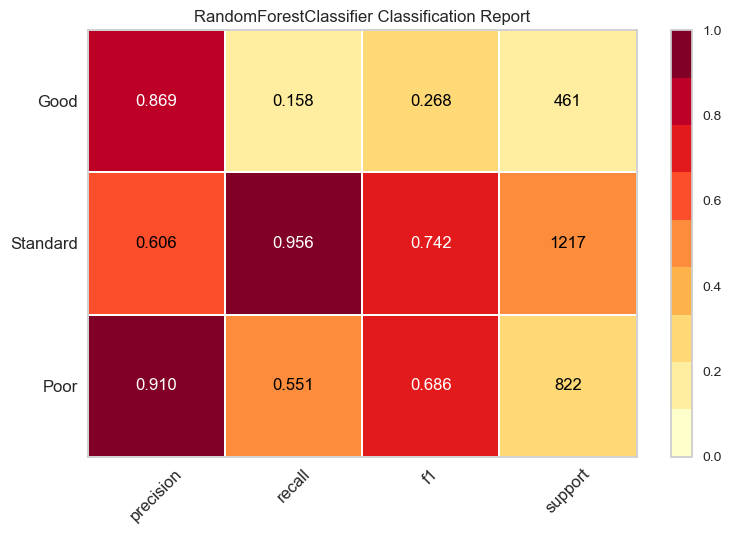

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [21]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

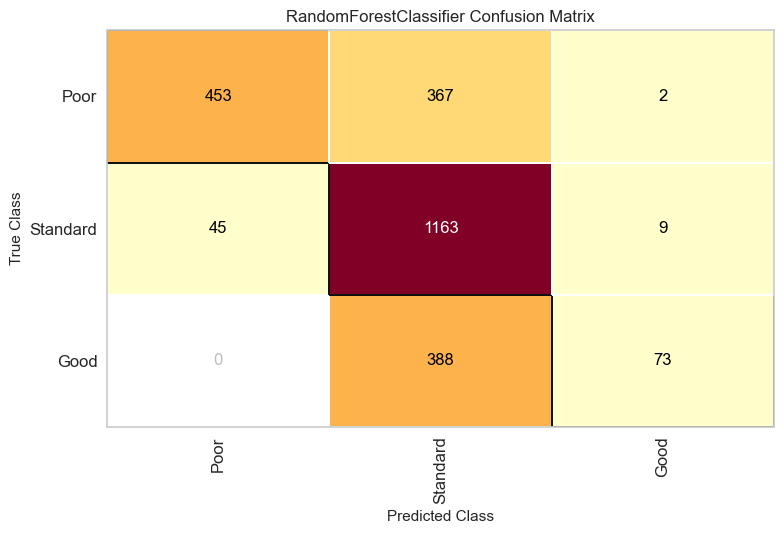

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

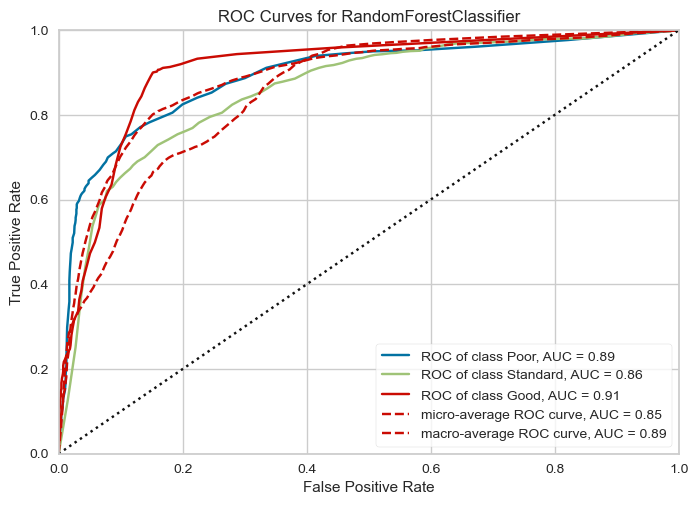

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Over-sample the Imbalanced Data with SMOTE

In [24]:
X_train

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
2242,CUS_0x335a,Jonathan Spicers,44.875000,807-68-7569,Musician,15599.88,1324.990000,6.0,8.0,21,...,7.500000,Bad,4384.60,31.519195,8.511905,Yes,66.732286,110.516031,High_spent_Small_value_payments,235.250682
6771,CUS_0x756a,Stempela,43.000000,547-30-4387,Writer,30257.02,2605.418333,10.0,6.0,33,...,9.625000,Bad,2437.84,29.526926,18.375000,Yes,78.089005,139.053356,Low_spent_Small_value_payments,317.351770
2045,CUS_0x3023,Stephenl,28.125000,775-12-4739,Musician,32613.68,2696.806667,9.0,5.0,28,...,10.750000,Bad,3868.66,31.503312,2.650000,Yes,116.688538,168.667568,High_spent_Large_value_payments,254.324561
5209,CUS_0x5ecf,Timm,16.625000,045-82-9696,Lawyer,31736.14,2813.678333,7.0,9.0,32,...,12.000000,Bad,2296.23,30.301917,20.208333,Yes,121.347992,138.518980,High_spent_Small_value_payments,289.000861
5498,CUS_0x62cf,Tomd,43.000000,619-24-8737,Mechanic,19399.32,1680.610000,10.0,7.0,27,...,11.875000,Bad,2443.94,27.291861,11.458333,Yes,98.047717,111.000797,Low_spent_Large_value_payments,233.662903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,CUS_0x77f8,Michael Martinah,48.000000,893-81-8271,Engineer,80942.22,6630.185000,5.0,1.0,11,...,4.000000,Good,405.01,33.520333,31.214286,No,0.000000,415.275889,High_spent_Large_value_payments,544.682634
5377,CUS_0x6112,Palmerd,40.500000,572-59-5510,Journalist,65677.38,5343.115000,3.0,1.0,4,...,0.428571,Good,395.28,32.603336,26.642857,No,217.616712,358.327887,Low_spent_Small_value_payments,246.975174
11491,CUS_0xbb33,Christiaane,48.000000,958-68-0188,Media_Manager,100971.60,8286.300000,2.0,6.0,7,...,2.750000,Good,1138.38,35.081978,17.166667,No,48.697558,428.256343,High_spent_Large_value_payments,701.565606
474,CUS_0x17e8,Koh Guii,35.000000,092-76-3178,Mechanic,102885.75,8543.812500,1.0,6.0,1,...,3.000000,Good,624.01,29.862910,24.958333,No,155.242198,528.662277,High_spent_Medium_value_payments,509.759539


In [25]:
from imblearn.over_sampling import SMOTENC

In [26]:
smt = SMOTENC(categorical_features=[0,1,3,4,11,16,20,23])
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [27]:
train_smt = pd.concat([X_train_smt, y_train_smt], axis=1)

Text(0, 0.5, 'Outstanding Debt')

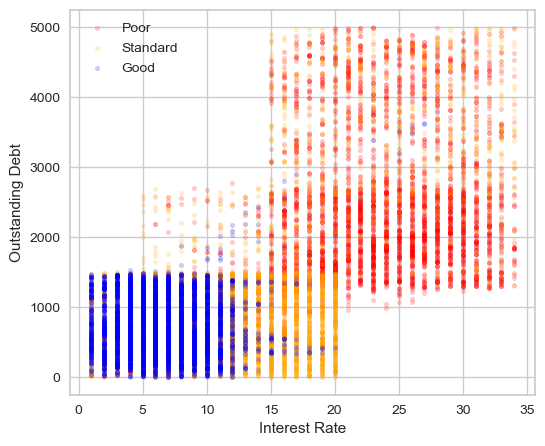

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(train_smt[train_smt["Credit_Score"]==0]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_smt[train_smt["Credit_Score"]==1]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_smt[train_smt["Credit_Score"]==2]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 7. Train RandomForesfClassifier with the SMOTE-over-sampled Data

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [31]:
model.fit(X_train_smt, y_train_smt)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x00000142C6248F90>),
                ('rfc', RandomForestClassifier())])

In [32]:
y_test_pred = model.predict(X_test)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       822
           1       0.68      0.87      0.76      1217
           2       0.68      0.47      0.56       461

    accuracy                           0.72      2500
   macro avg       0.73      0.66      0.68      2500
weighted avg       0.73      0.72      0.71      2500



In [34]:
confusion_matrix(y_test,y_test_pred)

array([[ 531,  260,   31],
       [  91, 1054,   72],
       [  11,  233,  217]], dtype=int64)

In [35]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

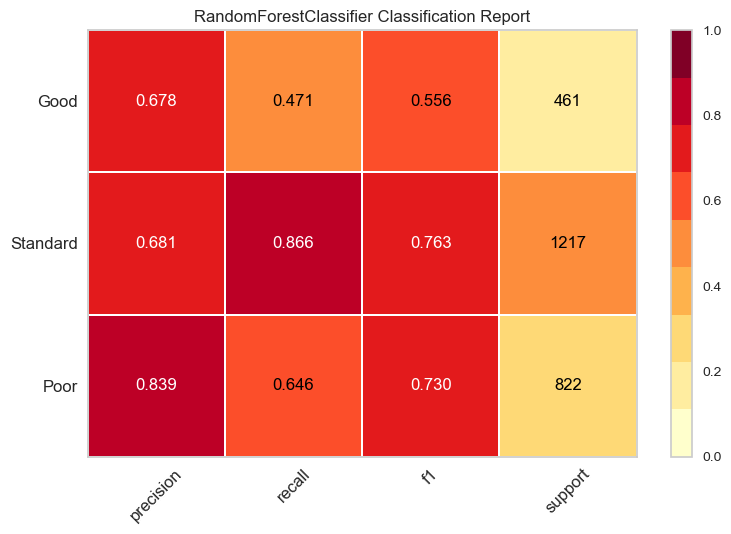

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [36]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

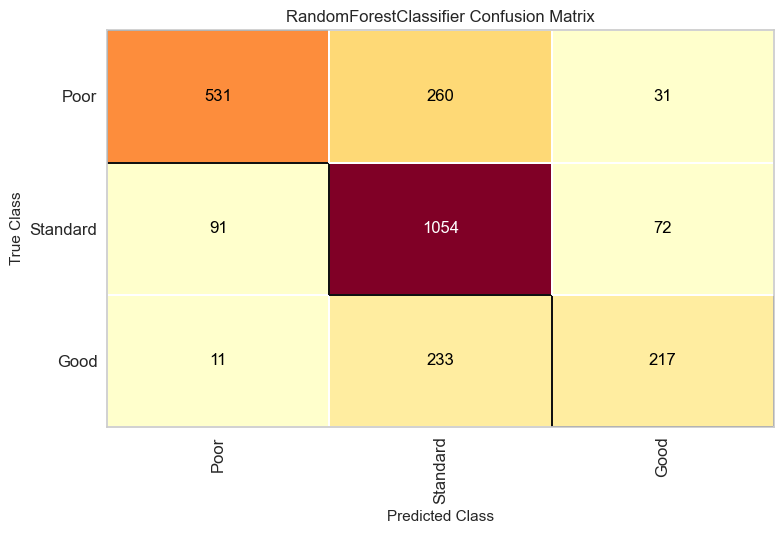

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

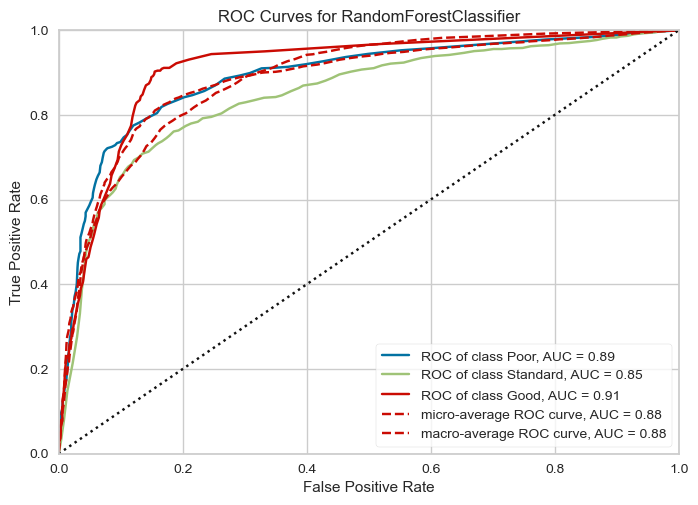

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 8. Over-sample the Imbalanced Data with ADASYN

In [39]:
dtf = Data_Transformer()
X_train = dtf.fit_transform(X_train)
X_test = dtf.transform(X_test)

In [40]:
from imblearn.over_sampling import ADASYN

In [41]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [42]:
train_ada = pd.concat([X_train_ada, y_train_ada], axis=1)

Text(0, 0.5, 'Outstanding Debt')

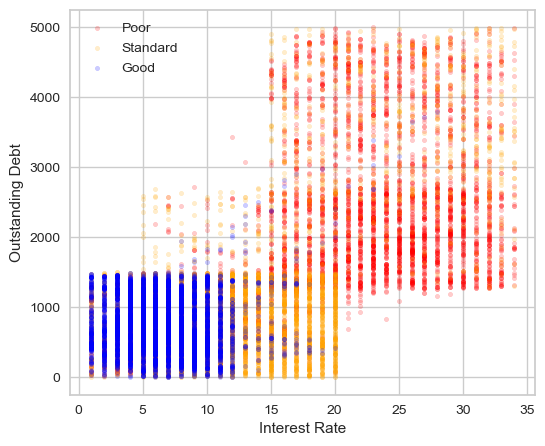

In [43]:
plt.figure(figsize=(6,5))
plt.scatter(train_ada[train_ada["Credit_Score"]==0]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_ada[train_ada["Credit_Score"]==1]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_ada[train_ada["Credit_Score"]==2]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 9. Train RandomForesfClassifier with the ADASYN-over-sampled Data

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model = RandomForestClassifier()

In [46]:
model.fit(X_train_ada, y_train_ada)

RandomForestClassifier()

In [47]:
y_test_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       822
           1       0.68      0.87      0.76      1217
           2       0.70      0.44      0.54       461

    accuracy                           0.72      2500
   macro avg       0.73      0.65      0.67      2500
weighted avg       0.73      0.72      0.71      2500



In [49]:
confusion_matrix(y_test,y_test_pred)

array([[ 531,  265,   26],
       [  99, 1057,   61],
       [  27,  232,  202]], dtype=int64)

In [50]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


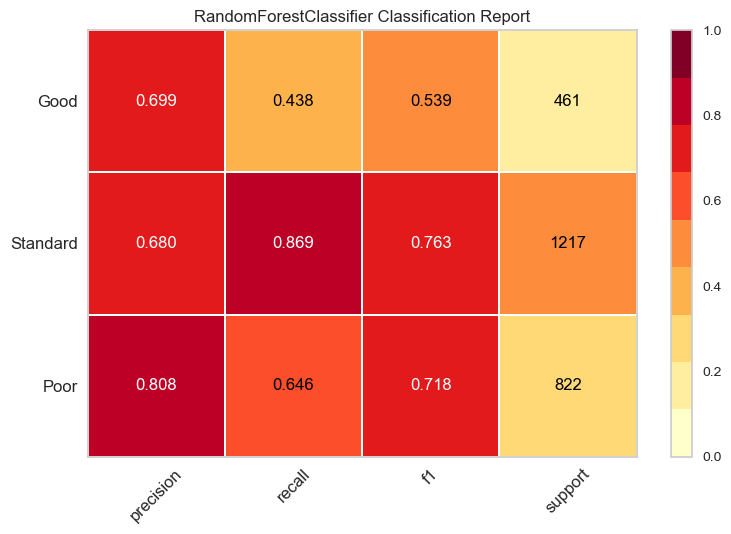

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [51]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


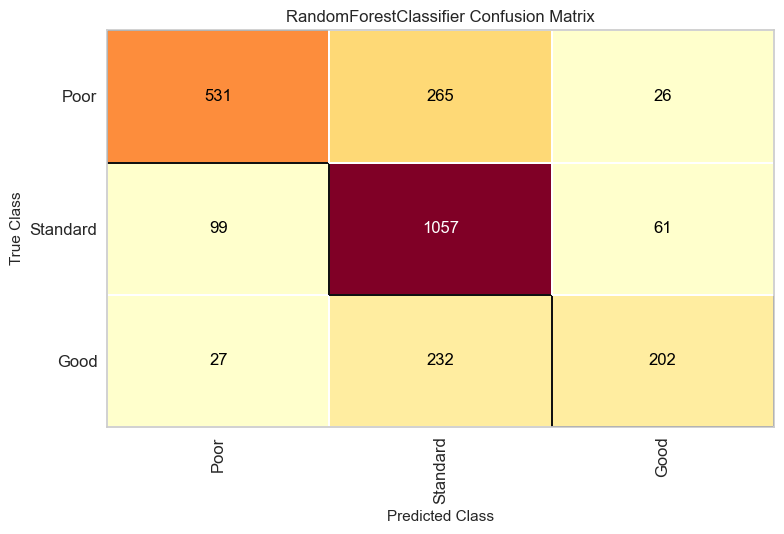

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


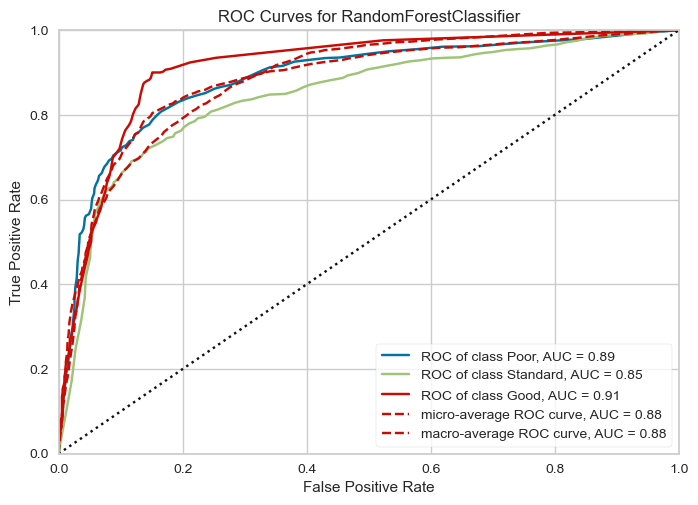

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()